# Multi-Input Model Classification in Keras (Deep Learning)

In [1]:
import os
os.getcwd()


'C:\\Users\\ghamy'

In [2]:
path = r"C:\Users\ghamy\OneDrive - University of South Australia\MS Data Science\Semester 4\Capstone Professional Project\Me (Noman)\keras-multi-input"
os.chdir(path)

In [3]:
os.getcwd()

'C:\\Users\\ghamy\\OneDrive - University of South Australia\\MS Data Science\\Semester 4\\Capstone Professional Project\\Me (Noman)\\keras-multi-input'

In [4]:
# Loading Python libraries
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# to read pickle files
import pickle

In [5]:
# Loading Data (4 files as dataframes)

# function for laoding pickle files
def loadObject(name):
    try:
        with open(name, 'rb') as f:
            return pickle.load(f)
    except FileNotFoundError:
        print('Could not find file "{}"". Please check it exists inc. the file extension'.format(str(name)))

# using function to load pickle files
myObject = loadObject('chatEmbeddings_2019-08-14-165706.pkl')
myObject1 = loadObject('transactionEmbeddings_2019-08-14-165704.pkl')

# Reading metadata and clickstream csv files 

data_df = pd.read_csv('Capstone_Final_Data.csv')


# converting files to data frames for EDA and further analysis
chat_df = pd.DataFrame(myObject)
transaction_df = pd.DataFrame(myObject1)




In [6]:
len(chat_df)

24104

In [7]:
len(transaction_df)

607087

# Creating a Model with Chat Embeddings Only

In [8]:
chat_df.head()

,applicationid,chatEmbedding,chatid,chatstarton,rating,sentiment_compound,status,user_type,utteranceid
0,0e730e97f5e23f177468cc459acb888c0ceb461eed15cb...,"[[0.012461126, 0.026670266, 0.0038820878, 0.04...",e0375487b152725bfb21b96876b260a5de52bfd69018ba...,2017-08-08,not_rated,0.0000,declined,visitor,8bd6b80d2aa9d4bab974b34ba0319c8cd73ec2441fb25d...
1,0e730e97f5e23f177468cc459acb888c0ceb461eed15cb...,"[[0.012461126, 0.026670266, 0.0038820878, 0.04...",e0375487b152725bfb21b96876b260a5de52bfd69018ba...,2017-08-08,not_rated,0.0000,declined,visitor,851ec87283eaffc8375c0bf42c7b38d95707a27ebdaf05...
2,d4cc10aa447414db05c8a6613065333f5de089475c3a5c...,"[[-0.015632771, 0.0395712, -0.021834029, -0.04...",4785521c6ff37491fd32d920faeb90871d85973cb81c01...,2017-08-16,rated_good,0.2263,declined,visitor,0514e95a2ca7e0c14eb862d4a3ef7810eda207dedeb60c...
3,d4cc10aa447414db05c8a6613065333f5de089475c3a5c...,"[[0.04322845, 0.023193743, -0.014702667, -0.04...",4785521c6ff37491fd32d920faeb90871d85973cb81c01...,2017-08-16,rated_good,0.0000,declined,visitor,f8e218879ec6a557ccc8905a5617ac191facfd0945aafe...
4,d4cc10aa447414db05c8a6613065333f5de089475c3a5c...,"[[0.013008025, 0.0027834661, 0.04260392, -0.01...",4785521c6ff37491fd32d920faeb90871d85973cb81c01...,2017-08-16,rated_good,0.4019,declined,visitor,4b55bbd6c7cf7a68b2048e75dd304a361d5092743a5145...


In [9]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

Using TensorFlow backend.


In [10]:
X = chat_df[['chatEmbedding']].copy()
y = chat_df[['status']].copy()

In [11]:
X.shape

(24104, 1)

In [12]:
embedding_matrix = chat_df.chatEmbedding[0]
from itertools import repeat
for i in range(24103):
    embedding_matrix = np.vstack((embedding_matrix, chat_df.chatEmbedding[i]))


In [13]:
X = embedding_matrix

In [14]:
X.shape

(385664, 9)

In [15]:
y = y.loc[y.index.repeat(16)].reset_index(drop=True)

In [16]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y = label_encoder.fit_transform(y)

In [17]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
X1_train.shape

(308531, 9)

In [19]:
X1_test.shape

(77133, 9)

In [20]:
y1_train.shape

(308531,)

In [21]:
y1_test.shape

(77133,)

In [22]:
from keras.utils import to_categorical
y1_train = to_categorical(y1_train)
y1_test = to_categorical(y1_test)

In [23]:
maxlen = 9
vocab_size = 16*24104

In [24]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 9, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(3, activation='softmax')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [25]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 9)                 0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 9, 9)              3470976   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               70656     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 3,542,019
Trainable params: 71,043
Non-trainable params: 3,470,976
_________________________________________________________________
None


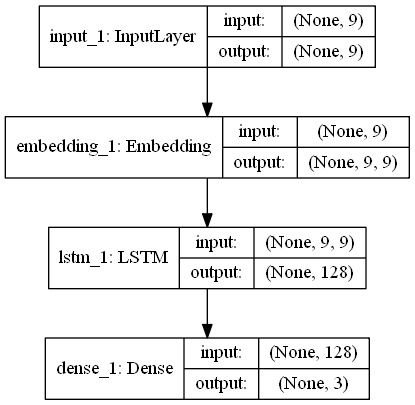

In [26]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

In [27]:
history = model.fit(X1_train, y1_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 246824 samples, validate on 61707 samples
Epoch 1/10
246824/246824 [==============================] - 38s 153us/step - loss: 0.9629 - acc: 0.4573 - val_loss: 0.9580 - val_acc: 0.4619
Epoch 2/10
246824/246824 [==============================] - 37s 148us/step - loss: 0.9618 - acc: 0.4595 - val_loss: 0.9579 - val_acc: 0.4619
Epoch 3/10
246824/246824 [==============================] - 36s 146us/step - loss: 0.9615 - acc: 0.4601 - val_loss: 0.9584 - val_acc: 0.4316
Epoch 4/10
246824/246824 [==============================] - 36s 147us/step - loss: 0.9615 - acc: 0.4597 - val_loss: 0.9581 - val_acc: 0.4619
Epoch 5/10
246824/246824 [==============================] - 36s 146us/step - loss: 0.9614 - acc: 0.4606 - val_loss: 0.9582 - val_acc: 0.4619
Epoch 6/10
246824/246824 [==============================] - 36s 148us/step - loss: 0.9614 - acc: 0.4605 - val_loss: 0.9580 - val_acc: 0.4619
Epoch 7/10
246824/246824 [==============================] - 36s 147us/step - loss: 0.9614 - acc: 0.4606

In [28]:
score = model.evaluate(X1_test, y1_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

77133/77133 [==============================] - 8s 108us/step
Test Score: 0.9601157445746428
Test Accuracy: 0.45832523703575134


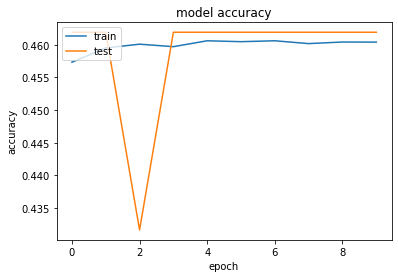

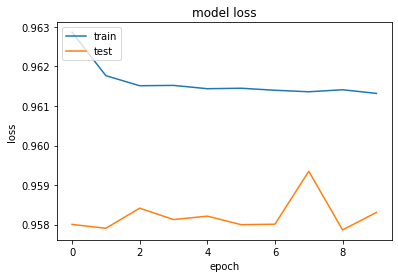

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Creating a Model with Transaction Embeddings Only

In [30]:
transaction_df.head()

,accountid,applicationid,financialinstitution,status,transactionEmbedding,transactionamount,transactioncategory,transactionposteddate,txnid
0,882a139cfcc370ed77493fa7940b9576c62cba020d2c39...,f38545158f037838b246a86459345fcebb094b3641fa5f...,ING,converted,"[[0.039921653, 0.0076719522, -0.02605666, -0.0...",180.00,IncomeSalaryRegularIncome,2018-06-18,ea8b12252c4b3e6c85b5fb29cb4d02d1252cf54df38fcd...
1,882a139cfcc370ed77493fa7940b9576c62cba020d2c39...,f38545158f037838b246a86459345fcebb094b3641fa5f...,ING,converted,"[[0.039921653, 0.0076719522, -0.02605666, -0.0...",174.00,IncomeSalaryRegularIncome,2018-06-04,68aad105bc429721b1cd8c7dc70acbaaca06d99e66486f...
2,882a139cfcc370ed77493fa7940b9576c62cba020d2c39...,f38545158f037838b246a86459345fcebb094b3641fa5f...,ING,converted,"[[0.0037002675, -0.032413684, 0.02330419, 0.00...",-1695.68,TransferTransfers,2018-06-01,b4ff9d37964cd9f73a0ca4ff9c702cd261f3d6e2b2d052...
3,882a139cfcc370ed77493fa7940b9576c62cba020d2c39...,f38545158f037838b246a86459345fcebb094b3641fa5f...,ING,converted,"[[-0.044274665, -0.030233014, -0.030928208, -0...",10264.00,IncomeOtherIncome,2018-05-22,dccdd51da721e751df8ce0ad77971ba97fbe6a39f762d8...
4,882a139cfcc370ed77493fa7940b9576c62cba020d2c39...,f38545158f037838b246a86459345fcebb094b3641fa5f...,ING,converted,"[[-0.023104716, -0.030675078, -0.017270565, 0....",-41.43,TransferSecuritiesTrades,2018-05-21,f29a19b4120787ce8cc90be800f0f6d62cc9180c31c293...


In [31]:
transaction_df1 = transaction_df.sample(frac =.5) 
transaction_df1 = transaction_df1.sample(frac =.5) 
transaction_df1 = transaction_df1.sample(frac =.5) 
transaction_df1 = transaction_df1.sample(frac =.5).reset_index(drop=True)

In [32]:
len(transaction_df1)

37943

In [33]:
transaction_df1.transactionEmbedding[0].shape

(16, 16)

In [34]:
X1 = transaction_df1[['transactionEmbedding']].copy()
y1 = transaction_df1[['status']].copy()

In [35]:
X1.shape

(37943, 1)

In [36]:
len(X1)

37943

In [37]:
embedding_matrix1 = transaction_df.transactionEmbedding[0]
from itertools import repeat
for i in range(37942):
    embedding_matrix1 = np.vstack((embedding_matrix1, transaction_df.transactionEmbedding[i]))


In [38]:
X1 = embedding_matrix1

In [39]:
X1.shape

(607088, 16)

In [40]:
len(y1)

37943

In [41]:
y1 = y1.loc[y1.index.repeat(16)].reset_index(drop=True)

In [42]:
len(y1)

607088

In [43]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y1 = label_encoder.fit_transform(y1)

In [44]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=42)

In [45]:
X_train1.shape

(485670, 16)

In [46]:
X_test1.shape

(121418, 16)

In [47]:
y_train1.shape

(485670,)

In [48]:
y_test1.shape

(121418,)

In [49]:
from keras.utils import to_categorical
y_train1 = to_categorical(y_train1)
y_test1 = to_categorical(y_test1)

In [50]:
maxlen1 = 16
vocab_size1 = 16*37943

In [51]:
deep_inputs1 = Input(shape=(maxlen1,))
embedding_layer1 = Embedding(vocab_size1, 16, weights=[embedding_matrix1], trainable=False)(deep_inputs1)
LSTM1_Layer_1 = LSTM(128)(embedding_layer1)
dense1_layer_1 = Dense(3, activation='softmax')(LSTM1_Layer_1)
model1 = Model(inputs=deep_inputs1, outputs=dense1_layer_1)

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [52]:
print(model1.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 16)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 16, 16)            9713408   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               74240     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 9,788,035
Trainable params: 74,627
Non-trainable params: 9,713,408
_________________________________________________________________
None


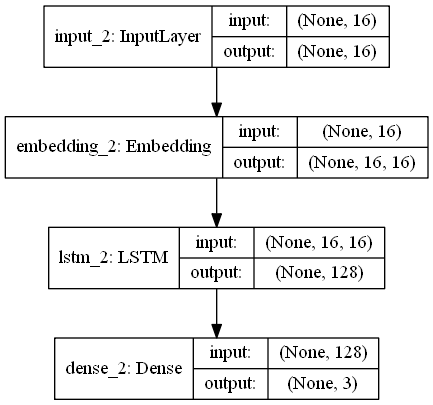

In [53]:

from keras.utils import plot_model
plot_model(model1, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [54]:
history1 = model1.fit(X_train1, y_train1, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 388536 samples, validate on 97134 samples
Epoch 1/10
388536/388536 [==============================] - 98s 252us/step - loss: 0.7783 - acc: 0.6836 - val_loss: 0.7761 - val_acc: 0.6857
Epoch 2/10
388536/388536 [==============================] - 99s 254us/step - loss: 0.7767 - acc: 0.6836 - val_loss: 0.7758 - val_acc: 0.6857
Epoch 3/10
388536/388536 [==============================] - 98s 253us/step - loss: 0.7765 - acc: 0.6836 - val_loss: 0.7758 - val_acc: 0.6857
Epoch 4/10
388536/388536 [==============================] - 99s 255us/step - loss: 0.7764 - acc: 0.6836 - val_loss: 0.7758 - val_acc: 0.6857
Epoch 5/10
388536/388536 [==============================] - 99s 254us/step - loss: 0.7764 - acc: 0.6836 - val_loss: 0.7760 - val_acc: 0.6857
Epoch 6/10
388536/388536 [==============================] - 99s 254us/step - loss: 0.7764 - acc: 0.6836 - val_loss: 0.7757 - val_acc: 0.6857
Epoch 7/10
388536/388536 [==============================] - 98s 253us/step - loss: 0.7763 - acc: 0.6836

In [55]:
score1 = model1.evaluate(X_test1, y_test1, verbose=1)

print("Test Score:", score1[0])
print("Test Accuracy:", score1[1])

121418/121418 [==============================] - 18s 152us/step
Test Score: 0.7756581446699122
Test Accuracy: 0.6854255795478821


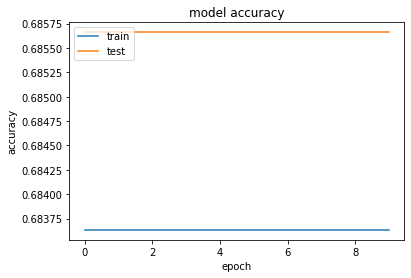

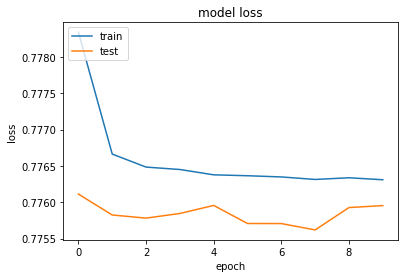

In [56]:
import matplotlib.pyplot as plt

plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Creating a Model with Numerical and Categorical Features Only

In [57]:
data_df.head()

,applicationid,status,propertystate,loanpurpose,repaymenttype,loanusage,ratetype,loanamount,loantovalueratio,applicationtype,...,finalpage,pagesvisited,howentered,conversionpathlen,financialinstitutionmode,transactioncategorymode,transactionamountmedian,chatratedpercentage,chatsentimentmean,chatlength
0,000429e2882bd4555885bacf9678c0a60e10610ab9b7f8...,declined,QLD,PUR,Principal & Interest,livein,variable,12.917403,0.657669,SINGLE,...,home | worlds first instant home loan,1.0,PaidSearch,1.0,ING,TransferCreditCardPayments,-13.27,0.000000,0.000000,0.0
1,003dec44f66a6d3f85bdc0080ec7a49bb7f4e02bf3c81e...,declined,WA,REF,Principal & Interest,livein,variable,13.575731,0.619600,JOINT,...,own your home loan | tic:toc,1.0,Native,1.0,None,None,0.00,0.000000,0.000000,0.0
2,00696bdea8b77f36209e48a29ea490b32acd26c33c0dbd...,declined,QLD,REF,Principal & Interest,investment,variable,12.681971,0.794400,JOINT,...,am i eligible for a tic:toc loan?,2.0,PaidSearch,4.0,Westpac,ExpensesAtmCashWithdraws,-51.00,0.000000,0.000000,0.0
3,00776b64bf03fe8de18742eb413ccd1ad5a57264febcaa...,declined,NSW,REF,Principal & Interest,livein,fixed,12.980556,0.494100,SINGLE,...,our home loans | tic:toc,1.0,Affiliates,1.0,Commonwealth Bank CBA,TransferTransfers,-5.00,0.000000,0.000000,0.0
4,0077be1ca38bcfa8b4d2cc8fc9ff2efdce1c106b4a8ef6...,converted,VIC,REF,Principal & Interest,livein,variable,12.282987,0.160800,JOINT,...,rates fees,6.0,PaidSearch,8.0,ANZ,ExpensesGroceries,-35.96,0.727273,0.349618,11.0


In [58]:
del data_df['applicationid']

In [59]:
data_df.head()

,status,propertystate,loanpurpose,repaymenttype,loanusage,ratetype,loanamount,loantovalueratio,applicationtype,agecreatedon,...,finalpage,pagesvisited,howentered,conversionpathlen,financialinstitutionmode,transactioncategorymode,transactionamountmedian,chatratedpercentage,chatsentimentmean,chatlength
0,declined,QLD,PUR,Principal & Interest,livein,variable,12.917403,0.657669,SINGLE,32.0,...,home | worlds first instant home loan,1.0,PaidSearch,1.0,ING,TransferCreditCardPayments,-13.27,0.000000,0.000000,0.0
1,declined,WA,REF,Principal & Interest,livein,variable,13.575731,0.619600,JOINT,72.0,...,own your home loan | tic:toc,1.0,Native,1.0,None,None,0.00,0.000000,0.000000,0.0
2,declined,QLD,REF,Principal & Interest,investment,variable,12.681971,0.794400,JOINT,42.0,...,am i eligible for a tic:toc loan?,2.0,PaidSearch,4.0,Westpac,ExpensesAtmCashWithdraws,-51.00,0.000000,0.000000,0.0
3,declined,NSW,REF,Principal & Interest,livein,fixed,12.980556,0.494100,SINGLE,30.0,...,our home loans | tic:toc,1.0,Affiliates,1.0,Commonwealth Bank CBA,TransferTransfers,-5.00,0.000000,0.000000,0.0
4,converted,VIC,REF,Principal & Interest,livein,variable,12.282987,0.160800,JOINT,65.0,...,rates fees,6.0,PaidSearch,8.0,ANZ,ExpensesGroceries,-35.96,0.727273,0.349618,11.0


In [60]:
list(data_df)

['status',
 'propertystate',
 'loanpurpose',
 'repaymenttype',
 'loanusage',
 'ratetype',
 'loanamount',
 'loantovalueratio',
 'applicationtype',
 'agecreatedon',
 'hasduplicate',
 'loanpercentdifference',
 'datedifference',
 'sessioncount',
 'visitdays',
 'daysjourney',
 'landingpage',
 'finalpage',
 'pagesvisited',
 'howentered',
 'conversionpathlen',
 'financialinstitutionmode',
 'transactioncategorymode',
 'transactionamountmedian',
 'chatratedpercentage',
 'chatsentimentmean',
 'chatlength']

In [61]:
X_meta = data_df[['propertystate',
 'loanpurpose',
 'repaymenttype',
 'loanusage',
 'ratetype',
 'loanamount',
 'loantovalueratio',
 'applicationtype',
 'agecreatedon',
 'hasduplicate',
 'loanpercentdifference',
 'datedifference',
 'sessioncount',
 'visitdays',
 'daysjourney',
 'landingpage',
 'finalpage',
 'pagesvisited',
 'howentered',
 'conversionpathlen',
 'financialinstitutionmode',
 'transactioncategorymode',
 'transactionamountmedian',
 'chatratedpercentage',
 'chatsentimentmean',
 'chatlength']]
Y_meta = data_df['status']

In [62]:
categorical_columns = X_meta.select_dtypes(include=['object'])

In [63]:
numerical_columns = X_meta.select_dtypes(exclude = ['object'])

In [64]:
list(numerical_columns)

['loanamount',
 'loantovalueratio',
 'agecreatedon',
 'hasduplicate',
 'loanpercentdifference',
 'datedifference',
 'sessioncount',
 'visitdays',
 'daysjourney',
 'pagesvisited',
 'conversionpathlen',
 'transactionamountmedian',
 'chatratedpercentage',
 'chatsentimentmean',
 'chatlength']

In [65]:
one_hot = pd.get_dummies(categorical_columns)
# Join the encoded df
X_meta = numerical_columns.join(one_hot)
X_meta.head()


,loanamount,loantovalueratio,agecreatedon,hasduplicate,loanpercentdifference,datedifference,sessioncount,visitdays,daysjourney,pagesvisited,...,transactioncategorymode_IncomeInterestIncome,transactioncategorymode_IncomeInvestmentRetirementIncome,transactioncategorymode_IncomeOtherIncome,transactioncategorymode_IncomeRefundsAdjustments,transactioncategorymode_IncomeSalaryRegularIncome,transactioncategorymode_IncomeSalesServiceIncome,transactioncategorymode_None,transactioncategorymode_TransferCreditCardPayments,transactioncategorymode_TransferSavings,transactioncategorymode_TransferTransfers
0,12.917403,0.657669,32.0,False,0.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
1,13.575731,0.619600,72.0,False,0.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,12.681971,0.794400,42.0,False,0.0,0.0,4.0,3.0,7.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,12.980556,0.494100,30.0,False,0.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,12.282987,0.160800,65.0,False,0.0,0.0,8.0,4.0,15.0,6.0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
list(X_meta)

['loanamount',
 'loantovalueratio',
 'agecreatedon',
 'hasduplicate',
 'loanpercentdifference',
 'datedifference',
 'sessioncount',
 'visitdays',
 'daysjourney',
 'pagesvisited',
 'conversionpathlen',
 'transactionamountmedian',
 'chatratedpercentage',
 'chatsentimentmean',
 'chatlength',
 'propertystate_ACT',
 'propertystate_NSW',
 'propertystate_NT',
 'propertystate_QLD',
 'propertystate_SA',
 'propertystate_TAS',
 'propertystate_VIC',
 'propertystate_WA',
 'loanpurpose_PUR',
 'loanpurpose_REF',
 'repaymenttype_Interest Only',
 'repaymenttype_Principal & Interest',
 'loanusage_investment',
 'loanusage_livein',
 'ratetype_fixed',
 'ratetype_variable',
 'applicationtype_JOINT',
 'applicationtype_SINGLE',
 'landingpage_(not set)',
 'landingpage_None',
 'landingpage_a smarter online home loan',
 'landingpage_am i eligible for a tic:toc loan?',
 'landingpage_calculators',
 'landingpage_get your instant fix | tic:toc',
 'landingpage_home',
 'landingpage_home loans made simple',
 'landingpa

In [67]:
X_meta = X_meta.values

In [68]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
Y_meta = label_encoder.fit_transform(Y_meta)

X2_train, X2_test, y2_train, y2_test = train_test_split(X_meta, Y_meta, test_size=0.20, random_state=42)

from keras.utils import to_categorical
y2_train = to_categorical(y2_train)
y2_test = to_categorical(y2_test)

In [69]:
X2_train.shape

(2067, 165)

In [70]:
y2_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [71]:
X_meta.shape

(2584, 165)

In [72]:
input2 = Input(shape=(165,))
dense_layer_1 = Dense(10, activation='relu')(input2)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(2, activation='softmax')(dense_layer_2)

model3 = Model(inputs=input2, outputs=output)
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [73]:
print(model3.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 165)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1660      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


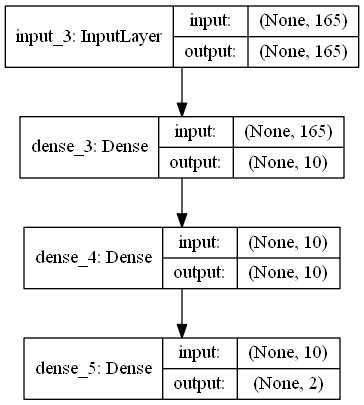

In [74]:
from keras.utils import plot_model
plot_model(model3, to_file='model_plot4.png', show_shapes=True, show_layer_names=True)

In [75]:
history3 = model3.fit(X2_train, y2_train, batch_size=16, epochs=10, verbose=1, validation_split=0.2)

Train on 1653 samples, validate on 414 samples
Epoch 1/10
1653/1653 [==============================] - 0s 163us/step - loss: 1.2740 - acc: 0.7217 - val_loss: 0.6929 - val_acc: 0.7174
Epoch 2/10
1653/1653 [==============================] - 0s 102us/step - loss: 0.6195 - acc: 0.7526 - val_loss: 0.5803 - val_acc: 0.7391
Epoch 3/10
1653/1653 [==============================] - 0s 111us/step - loss: 0.5313 - acc: 0.7604 - val_loss: 0.6163 - val_acc: 0.7271
Epoch 4/10
1653/1653 [==============================] - 0s 109us/step - loss: 0.5140 - acc: 0.7707 - val_loss: 0.5284 - val_acc: 0.7633
Epoch 5/10
1653/1653 [==============================] - 0s 103us/step - loss: 0.4836 - acc: 0.7937 - val_loss: 0.5108 - val_acc: 0.7560
Epoch 6/10
1653/1653 [==============================] - 0s 109us/step - loss: 0.4776 - acc: 0.7919 - val_loss: 0.5330 - val_acc: 0.7391
Epoch 7/10
1653/1653 [==============================] - 0s 104us/step - loss: 0.4626 - acc: 0.7955 - val_loss: 0.5038 - val_acc: 0.7657
E

In [76]:
score = model3.evaluate(X2_test, y2_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

517/517 [==============================] - 0s 39us/step
Test Score: 0.4660829643446887
Test Accuracy: 0.7891682982444763


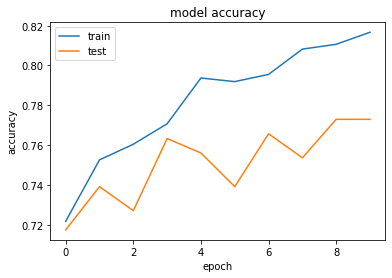

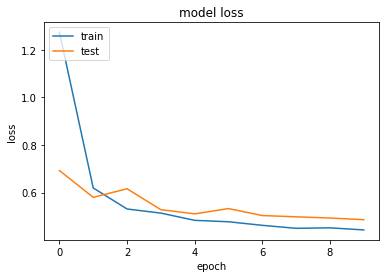

In [77]:
import matplotlib.pyplot as plt

plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Creating a model with multiple Inputs

In [78]:
X_all = data_df.drop('status', axis=1)

y_all = data_df['status']

In [79]:
input_1 = deep_inputs

In [80]:
input_2 = deep_inputs1

In [81]:
input_3 = input2

In [82]:
embedding_layer = Embedding(vocab_size, 9, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)

In [83]:
embedding_layer1 = Embedding(vocab_size1, 16, weights=[embedding_matrix1], trainable=False)(deep_inputs1)
LSTM1_Layer_1 = LSTM(128)(embedding_layer1)

In [84]:
dense_layer_1 = Dense(10, activation='relu')(input2)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)

In [85]:
concat_layer = Concatenate()([LSTM_Layer_1, LSTM1_Layer_1, dense_layer_2])
dense_layer_3 = Dense(10, activation='relu')(concat_layer)
output = Dense(2, activation='softmax')(dense_layer_3)
model = Model(inputs=[input_1, input_2, input_3], outputs=output)

In [86]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 9)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 16)           0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 165)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 9, 9)         3470976     input_1[0][0]                    
____________________________________________________________________________________________

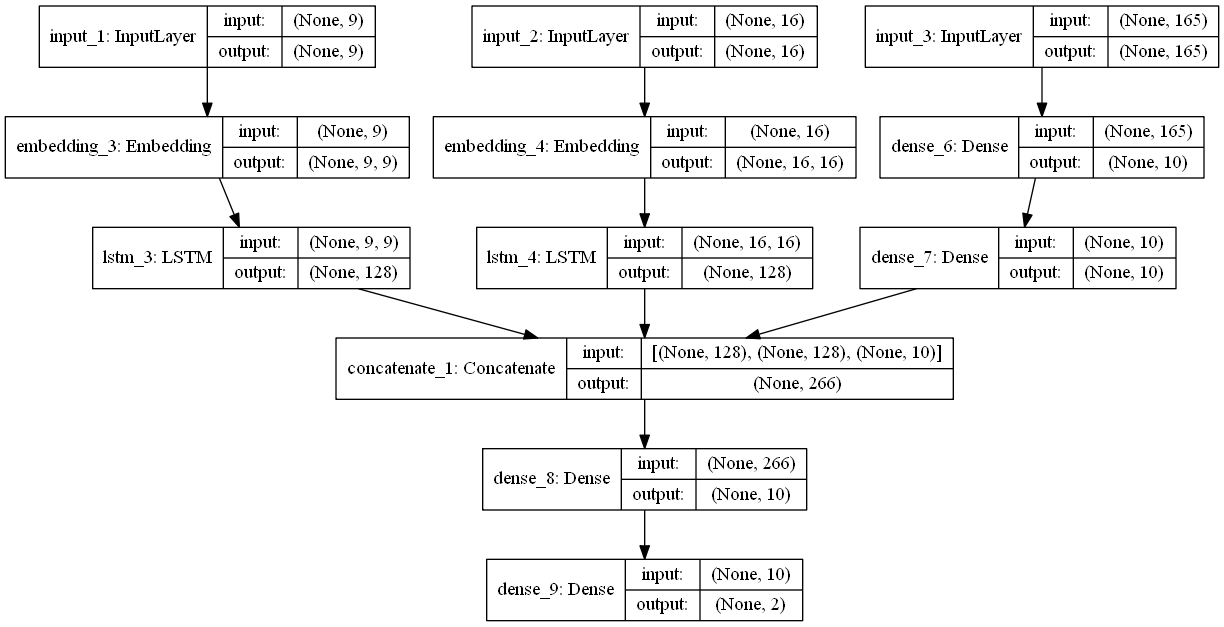

In [87]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot10.png', show_shapes=True, show_layer_names=True)

In [94]:
chat_sample = chat_df.sample(frac =.5).reset_index(drop=True)

In [95]:
X_chat = chat_sample[['chatEmbedding']].copy()
y_chat = chat_sample[['status']].copy()

In [96]:
X_chat.head()

,chatEmbedding
0,"[[0.049316082, -0.028134419, -0.0039340854, -0..."
1,"[[0.0061173066, 0.027049866, 0.034262944, 0.03..."
2,"[[0.012461126, 0.026670266, 0.0038820878, 0.04..."
3,"[[-0.03313612, -0.040273093, 0.045684863, 0.00..."
4,"[[-0.031457342, 0.015733805, 0.0004924163, 0.0..."


In [97]:
embedding_matrix_chat = chat_sample.chatEmbedding[0]
from itertools import repeat
for i in range(2583):
    embedding_matrix_chat = np.vstack((embedding_matrix_chat, chat_sample.chatEmbedding[i]))


In [98]:
X_chat = embedding_matrix_chat

In [99]:
len(X_chat)

41344

In [100]:
X_chat

array([[ 0.04931608, -0.02813442, -0.00393409, ..., -0.03665318,
         0.03322506, -0.00821692],
       [ 0.04588422, -0.03441215,  0.04253813, ...,  0.04968306,
        -0.00523638, -0.03781908],
       [-0.03105731,  0.01267215,  0.0374504 , ...,  0.01573402,
        -0.00988596,  0.03196551],
       ...,
       [ 0.01246113,  0.02667027,  0.00388209, ..., -0.00864174,
         0.02887807,  0.03490983],
       [ 0.01246113,  0.02667027,  0.00388209, ..., -0.00864174,
         0.02887807,  0.03490983],
       [ 0.01246113,  0.02667027,  0.00388209, ..., -0.00864174,
         0.02887807,  0.03490983]], dtype=float32)

In [101]:
y_chat = y_chat.loc[y_chat.index.repeat(16)].reset_index(drop=True)

In [102]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y_chat = label_encoder.fit_transform(y_chat)

In [103]:
X_chat.shape

(41344, 9)

In [104]:
y_chat.shape

(192832,)

In [105]:
idx = np.random.choice(np.arange(len(X_chat)), 2584, replace=False)
x_sample = X_chat[idx]
y_sample = y_chat[idx]

In [106]:
x_sample.shape

(2584, 9)

In [107]:
y_sample.shape

(2584,)

In [108]:
X_train_chat, X_test_chat, y_train_chat, y_test_chat = train_test_split(x_sample, y_sample, test_size=0.20, random_state=42)

In [109]:
X_transaction = chat_sample[['chatEmbedding']].copy()
y_transaction = chat_sample[['status']].copy()

In [110]:
X1.shape

(607088, 16)

In [111]:
y1.shape

(607088,)

In [112]:
idx1 = np.random.choice(np.arange(len(X1)), 2584, replace=False)
x_trans = X1[idx1]
y_trans = y1[idx1]

In [113]:
X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(x_trans, y_trans, test_size=0.20, random_state=42)

In [115]:
history4 = model.fit(x=[X_train_chat, X_train_trans, X2_train], y=y2_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 1653 samples, validate on 414 samples
Epoch 1/10
1653/1653 [==============================] - 1s 315us/step - loss: 0.5082 - acc: 0.7586 - val_loss: 0.5179 - val_acc: 0.7367
Epoch 2/10
1653/1653 [==============================] - 1s 317us/step - loss: 0.5014 - acc: 0.7647 - val_loss: 0.5166 - val_acc: 0.7319
Epoch 3/10
1653/1653 [==============================] - 1s 341us/step - loss: 0.4953 - acc: 0.7635 - val_loss: 0.5164 - val_acc: 0.7367
Epoch 4/10
1653/1653 [==============================] - 1s 317us/step - loss: 0.4928 - acc: 0.7671 - val_loss: 0.5094 - val_acc: 0.7391
Epoch 5/10
1653/1653 [==============================] - 1s 327us/step - loss: 0.4840 - acc: 0.7743 - val_loss: 0.5038 - val_acc: 0.7464
Epoch 6/10
1653/1653 [==============================] - 1s 322us/step - loss: 0.4736 - acc: 0.7737 - val_loss: 0.5060 - val_acc: 0.7440
Epoch 7/10
1653/1653 [==============================] - 1s 327us/step - loss: 0.4681 - acc: 0.7834 - val_loss: 0.4944 - val_acc: 0.7488
E

In [116]:
score = model.evaluate(x=[X_test_chat, X_test_trans, X2_test], y=y2_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

517/517 [==============================] - 0s 201us/step
Test Score: 0.46383213103393983
Test Accuracy: 0.7736943960189819


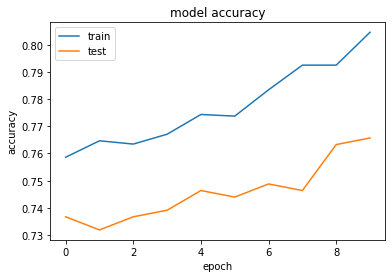

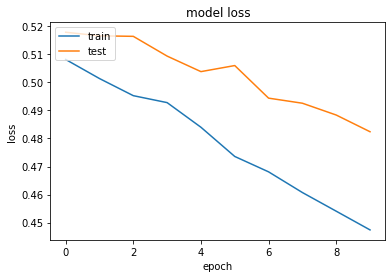

In [117]:
import matplotlib.pyplot as plt

plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()